In [11]:
#Import Packages

import numpy as np

import pandas as pd

import matplotlib as plt

from statsmodels.formula.api import ols

from sklearn.linear_model import Ridge

from sklearn.linear_model import RidgeCV

from sklearn.linear_model import Lasso
 
from sklearn.linear_model import LassoCV


In [12]:
# data exploration

def dataexploration(df):
    #Store na values in separate dataframe, and then drop them from primary dataset
    null_df = df.isnull()
    rows_has_na = null_df.any(axis = 1)
    rows_with_na = df[rows_has_na]
    df = df.dropna(axis=0)
    #Calculate Summary Statistics for Numerical and Binary Variables
    print(df[['home_win_pct', 'away_win_pct', 'temp', 'pct_season_completed', 'is_bobblehead', 'attendance']].describe())
    #Histogram to Look at Distribution of Attendance Variable
    df_histogram = df.hist(column='attendance', bins = 5)
    print(df_histogram)

    

In [13]:
# linear regression model

def linearregression(df):
    #Make sure to turn categorical variables into binary variables for regression + run regression model
    fit = ols('attendance ~ home_win_pct + away_win_pct + C(opposing_team) + C(day_of_week_effect) + temp + pct_season_completed + is_bobblehead', data = df).fit()
    
    linear = fit.summary()
    
    return linear
    

In [14]:
#Creating dummy variables from categorical variables
def dummies(df):
     #Create dummy variables from categorical variables
    dummies = pd.get_dummies(df, columns=['opposing_team', 'day_of_week_effect'])
    #Drop one value from each set of dummy variables
    dummies = dummies.drop(['opposing_team_1', 'day_of_week_effect_1'], axis=1)
    #Create dependent variable dataframe
    Y = dummies['attendance']
    #Drop attendance from explanatory variable dataframe
    X = dummies.drop(['attendance'], axis=1)
    return X, Y

In [15]:
# ridge regression model
def ridge(X,Y):
    #Determine optimal value for alpha in 10-fold cross-validation Ridge regression
    model = RidgeCV(alphas = np.arange(0.01,10,0.01), cv=10)
    model.fit(X, Y)
    #Use best lambda value in final ridge regrssion
    final_ridge = Ridge(alpha=model.alpha_)
    final_ridge.fit(X, Y)    
    return model, final_ridge


In [16]:
#LASSO regression model
def lasso(X,Y):
    #Determine optimal value for alpha in 10-fold cross-validation LASSO regression
    model = LassoCV(cv=10, random_state=0, max_iter=10000)
    model.fit(X, Y)
    #Use best alpha value in final LASSO regrssion
    final_lasso = Lasso(alpha=model.alpha_)
    final_lasso.fit(X, Y)   
    return model, final_lasso

       home_win_pct  away_win_pct        temp  pct_season_completed  \
count    810.000000    810.000000  810.000000            810.000000   
mean       0.016073      0.030918    0.012921              0.499375   
std        0.979720      0.993248    1.001152              0.288679   
min       -2.809775     -2.695329   -2.917976              0.000863   
25%       -0.606891     -0.660149   -0.639705              0.255120   
50%        0.019855      0.054645   -0.034318              0.495445   
75%        0.663517      0.668634    0.680898              0.747405   
max        3.241040      3.390371    3.421095              0.997738   

       is_bobblehead    attendance  
count     810.000000    810.000000  
mean        0.096296  28034.881481  
std         0.295179   5854.629167  
min         0.000000   9761.000000  
25%         0.000000  24055.000000  
50%         0.000000  27846.000000  
75%         0.000000  31933.500000  
max         1.000000  47136.000000  
[[<matplotlib.axes._subplot

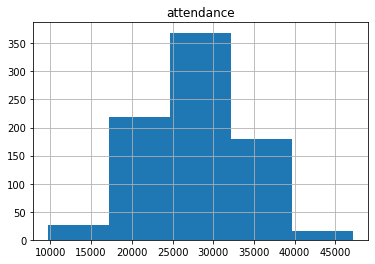

In [17]:
# load dataset, main function

df = pd.read_csv('data_for_exercise.csv')

df.drop('Unnamed: 0', axis = 1, inplace= True)


def main(df):
    dataexploration(df)
    linear = linearregression(df)
    X, Y = dummies(df)
    model_ridge, final_ridge = ridge(X,Y)
    model_lasso, final_lasso = lasso(X,Y)    
    return linear, X, Y, model_ridge, final_ridge, model_lasso, final_lasso

linear, X, Y, model_ridge, final_ridge, model_lasso, final_lasso = main(df)

In [18]:
#linear regression results

print(linear)

                            OLS Regression Results                            
Dep. Variable:             attendance   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     170.7
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:19:10   Log-Likelihood:                -7257.7
No. Observations:                 810   AIC:                         1.460e+04
Df Residuals:                     770   BIC:                         1.478e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [19]:
#ridge regression results

print('Optimal lambda for Ridge is:', model_ridge.alpha_)

print ('')

print('Slope coefficients, and their corresponding variables, for Ridge regression are:')

print('')

print(list(zip(final_ridge.coef_, X)))

print('')

print('R squared for Ridge:', round(final_ridge.score(X, Y), 3))


Optimal lambda for Ridge is: 0.34

Slope coefficients, and their corresponding variables, for Ridge regression are:

[(3962.0579183362406, 'home_win_pct'), (1555.0708403488889, 'away_win_pct'), (-131.56964308141633, 'temp'), (1552.0089762983378, 'pct_season_completed'), (-38.89604026967215, 'is_bobblehead'), (5079.853120515567, 'opposing_team_2'), (3448.1768829041216, 'opposing_team_3'), (3633.297248026766, 'opposing_team_4'), (4218.210418766256, 'opposing_team_5'), (-231.58561954631432, 'opposing_team_6'), (779.4356298234078, 'opposing_team_7'), (-645.3297510317062, 'opposing_team_8'), (-50.17161974289533, 'opposing_team_9'), (136.79814832931842, 'opposing_team_10'), (403.02319942405165, 'opposing_team_11'), (-509.5284869760396, 'opposing_team_12'), (95.41562918533064, 'opposing_team_13'), (852.0154219916445, 'opposing_team_14'), (26.602923067112616, 'opposing_team_15'), (601.142786019412, 'opposing_team_16'), (135.5428404347691, 'opposing_team_17'), (-227.10088216839947, 'opposing_te

In [20]:
#lasso regression results

print('Optimal lambda for Lasso is:', model_lasso.alpha_)

print('')

print('Slope coefficients, and their corresponding variables, for Lasso regression are:')

print('')

print(list(zip(final_lasso.coef_, X)))

print('')

print('R squared for Lasso:', round(final_lasso.score(X, Y), 3))


Optimal lambda for Lasso is: 6.383656131149376

Slope coefficients, and their corresponding variables, for Lasso regression are:

[(3962.280261732839, 'home_win_pct'), (1538.2332026884653, 'away_win_pct'), (-121.51139531767568, 'temp'), (1454.560697942211, 'pct_season_completed'), (-0.0, 'is_bobblehead'), (4777.783897873623, 'opposing_team_2'), (3110.0610921503253, 'opposing_team_3'), (3337.2687515378875, 'opposing_team_4'), (3941.482436867295, 'opposing_team_5'), (-225.5468679811387, 'opposing_team_6'), (389.78434039782843, 'opposing_team_7'), (-638.4647467054193, 'opposing_team_8'), (-57.92869226894912, 'opposing_team_9'), (-0.0, 'opposing_team_10'), (0.0, 'opposing_team_11'), (-497.94265977395787, 'opposing_team_12'), (-0.0, 'opposing_team_13'), (437.07058004371567, 'opposing_team_14'), (-0.0, 'opposing_team_15'), (186.1650439561987, 'opposing_team_16'), (-0.0, 'opposing_team_17'), (-230.11827194712447, 'opposing_team_18'), (156.87209142935848, 'opposing_team_19'), (0.0, 'opposing_t

Question 1:

The key algorithmic differences between the three models lie within their loss function, which is defined as how much variation there is in the response variable that is left unexplained by the model. A standard linear regression’s loss function is simply the sum of squared residuals – for each observation, the difference between the actual value of the response variable and the predicted value squared, all summed together. On the other hand, both the Ridge regression and LASSO regression introduce a penalty term that ultimately increases the model's bias, but decreases variance. For LASSO, the general idea is to shrink the coefficients in the linear model towards the central point as the mean. The Lasso loss function is equal to the sum of squared residuals plus a term of lambda (the penalty term that denotes the amount of shrinkage that will be implemented in the equation) multiplied by the sum of all the absolute values of the coefficients. The Ridge regression’s loss function is the same as the LASSO regression’s, except lambda is multiplied by the sum of all the squared values of the coefficients. 


Question 2:

I believe that the LASSO regression model makes the best prediction. While all three models have the same R2 value of 0.896 (an R2 value is defined as the proportion of the variation in the dependent variable that is predictable from the independent variables in the model), both the Ridge regression model and LASSO regression model help address concerns of multicollinearty and overfitting. With many of the independent variables in the model being binary variables that represent different values of opposing_team and day_of_week_effect, the linear regression model suffers from concerns of multicollinearity. Ultimately, I believe that the LASSO regression model is better than the Ridge regression model because the LASSO regression removes less important variables from the model by shrinking their slope coefficients to zero. This creates a simpler model, and also addresses overfitting concerns, allowing for more accurate and useful predictions.



Question 3:
    
To determine which variables have the strongest effect on attendance, I looked at the magnitude of the slope coefficients, and most importantly, the T statistics, representing statistical significance. With a very large and dominating T statistic of 55.96 in the standard linear model, it strongly suggests that home win percent is the most important variable towards predicting attendance. Away win percent is also very important, with a T statistic of 22.19. The day of the week also is an important predictor of attendance, as days 2,3,4, and 5 all have T statistics with high absolute values and slope coefficients that are highly negative (significantly low attendance). While most of the T statistics for the binary variables representing different opposing teams are relatively low in magnitude, teams labeled 2,3,4, and 5 have a large statistically significant positive effect on attendance. 
